In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
def generate_data(mask, ds):
    lat_ind = np.random.randint(low = 0, high = mask.shape[0])
    lon_ind = np.random.randint(low = 0, high = mask.shape[1])
    years = (mask*ds.p.to_numpy())[:,:,lat_ind,lon_ind].flatten()
    years = years[years != 0]
    years = years[~np.isnan(years)]
    return years

In [3]:
ds = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_'+
                     'wildfires_theo_keeping/live/ensemble_summaries/'+
                     'annual_fires_705_historical.nc').load()
mask = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_'+
                       'wildfires_theo_keeping/live/ensemble_data/'+
                       'mask_conus_2000_2009.nc').mask.to_numpy()

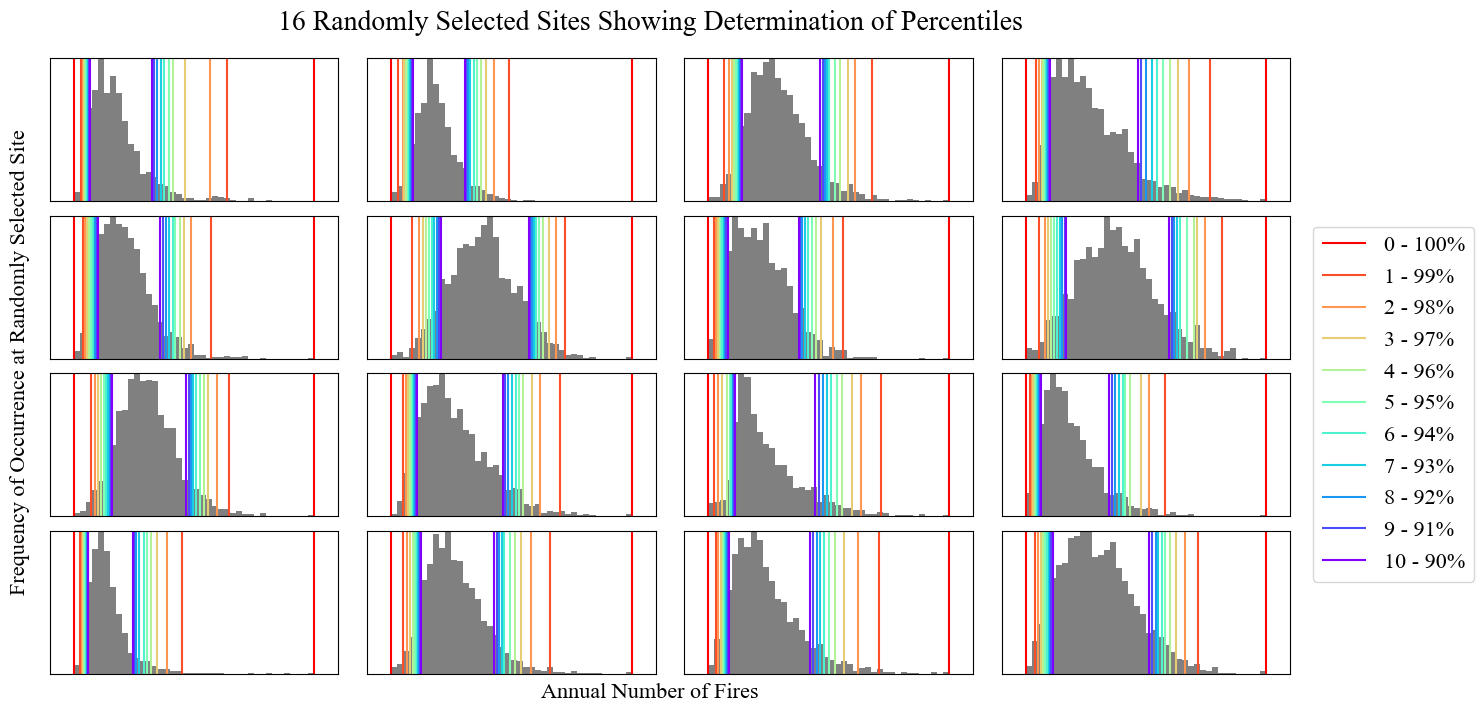

In [5]:
tnr = FontProperties(fname = '/rds/general/user/tk22/home/fonts/times.ttf',
                     size = 16)

fig, axs = plt.subplots(4,4,figsize = (16,8))
for i in range(4):
    for j in range(4):
        years = generate_data(mask, ds)
        while len(years) == 0:
            years = generate_data(mask, ds)
            
        im = axs[i,j].hist(years, color = 'grey',
                           bins = 40, density = True)

        color = plt.cm.rainbow_r(np.linspace(0, 1, 11))
        for q in range(11):
            axs[i,j].vlines([np.quantile(years,q/100), np.quantile(years,1-q/100)],
                            np.min(im[0]), np.max(im[0]), colors = color[q],
                            label = f'{q} - {100-q}%')
        axs[i,j].set_xlim((np.min(im[1]) - (np.max(im[1]) - np.min(im[1]))/10,
                           np.max(im[1]) + (np.max(im[1]) - np.min(im[1]))/10))
        axs[i,j].set_ylim((np.min(im[0]), np.max(im[0])))
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
        if (i == 1) and (j == 3):
            axs[i,j].legend(loc = 'upper left', bbox_to_anchor=(1.04, 1), prop = tnr)
        
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
fig.text(0.5, 0.08, 'Annual Number of Fires', ha = 'center', font = tnr)
fig.text(0.10, 0.5, 'Frequency of Occurrence at Randomly Selected Site',
         va = 'center', rotation = 'vertical', font = tnr)
plt.suptitle('16 Randomly Selected Sites Showing Determination of Percentiles',
             font = tnr, fontsize = 20, y = 0.94)

plt.savefig(('/rds/general/user/tk22/home/paper_2/'+
             f'final_figures/figures/supplementary_figure_2.jpg'), 
            bbox_inches = 'tight', facecolor = 'white', dpi = 300)
plt.show()